In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("autoclean.csv")

In [4]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,Horsepowerbinned,diesel,gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0


In [7]:
df.drop("Unnamed: 0",axis="columns",inplace=True)

In [8]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,Horsepowerbinned,diesel,gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.886584,...,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.886584,...,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.905947,...,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.915629,...,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.918396,...,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0


<h2 id="pattern_visualization">2. Analyzing Individual Feature Patterns using Visualization</h2>

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg          float64
price                float64
city-L/100km         float64
Horsepowerbinned      object
diesel                 int64
gas                    int64
aspiration-std         int64
aspiration-turbo       int64
dtype: object

In [15]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.465190,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130083,-0.008689,...,0.071380,0.273679,-0.035823,-0.030190,-0.082201,0.063165,-0.194311,0.194311,0.059866,-0.059866
normalized-losses,0.465190,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.029266,0.054929,...,0.203434,0.237748,-0.218749,0.178527,0.133999,0.232682,-0.101437,0.101437,0.006823,-0.006823
wheel-base,-0.531954,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.160944,...,0.351985,-0.360704,-0.470414,0.578128,0.583168,0.474040,0.308346,-0.308346,-0.257611,0.257611
length,-0.357612,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.129522,...,0.554408,-0.287031,-0.670909,0.711597,0.682986,0.659165,0.212679,-0.212679,-0.234539,0.234539
width,-0.232919,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182939,...,0.642176,-0.219859,-0.642704,0.728044,0.728699,0.682850,0.233880,-0.233880,-0.300567,0.300567
height,-0.541038,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.055351,...,-0.110114,-0.320602,-0.048640,0.085892,0.134388,-0.002333,0.284631,-0.284631,-0.087311,0.087311
curb-weight,-0.227691,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168783,...,0.750973,-0.266283,-0.757414,0.836742,0.820825,0.791911,0.217275,-0.217275,-0.324902,0.324902
engine-size,-0.105790,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.203094,...,0.810705,-0.244599,-0.653658,0.777077,0.861752,0.744952,0.069594,-0.069594,-0.108217,0.108217
bore,-0.130083,-0.029266,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.055909,...,0.575707,-0.254761,-0.584508,0.551943,0.532300,0.555960,0.054457,-0.054457,-0.212623,0.212623
stroke,-0.008689,0.054929,0.160944,0.129522,0.182939,-0.055351,0.168783,0.203094,-0.055909,1.000000,...,0.088133,-0.066844,-0.042179,0.055433,0.082095,0.042550,0.241820,-0.241820,-0.222970,0.222970



<h2><p>Find the correlation between the following columns: bore, stroke,compression-ratio , and horsepower.</p></h2>

In [30]:
df[["bore","stroke","compression-ratio","horsepower"]].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055909,0.005201,0.575707
stroke,-0.055909,1.000000,0.186105,0.088133
compression-ratio,0.005201,0.186105,1.000000,-0.205717
horsepower,0.575707,0.088133,-0.205717,1.000000


<h2>Continuous numerical variables:</h2> 

<p>Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.</p>

Let's find the scatterplot of "engine-size" and "price" 

In [31]:
df[["engine-size","price"]].head()

,engine-size,price
0,130,13495.0
1,130,16500.0
2,152,16500.0
3,109,13950.0
4,136,17450.0


(0.0, 52711.17041960189)

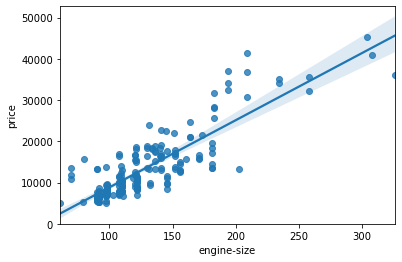

In [32]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size",y="price",data=df)
plt.ylim(0,)

In [33]:
df[["engine-size","price"]].corr()

,engine-size,price
engine-size,1.000000,0.861752
price,0.861752,1.000000


In [34]:
df[["highway-mpg","price"]].head()

,highway-mpg,price
0,8.703704,13495.0
1,8.703704,16500.0
2,9.038462,16500.0
3,7.833333,13950.0
4,10.681818,17450.0


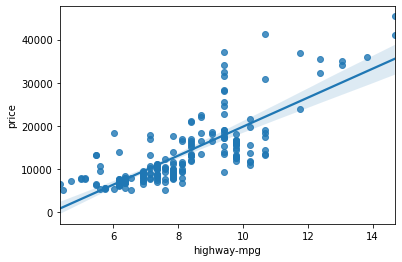

In [35]:
#Highway mpg is a potential predictor variable of price 
sns.regplot(x="highway-mpg", y="price", data=df)

## Weak Linear Relationship 

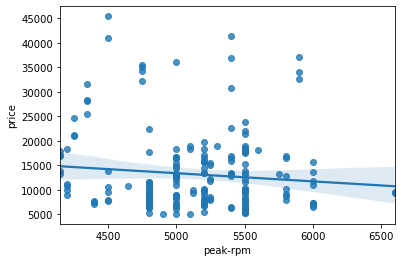

In [36]:
sns.regplot(x="peak-rpm", y="price", data=df)

In [37]:
df[["peak-rpm","price"]].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.100854
price,-0.100854,1.000000


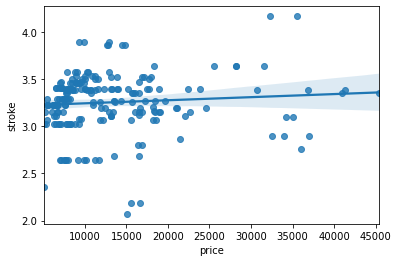

In [40]:
sns.regplot(x="price",y="stroke",data=df)

<h3>Categorical variables</h3>

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>

Let's look at the relationship between "body-style" and "price".

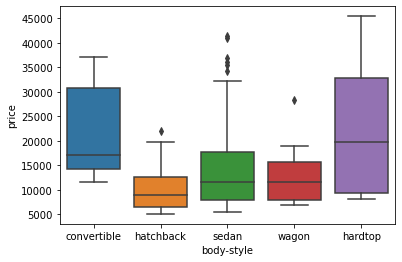

In [42]:
sns.boxplot(x="body-style",y="price",data=df)

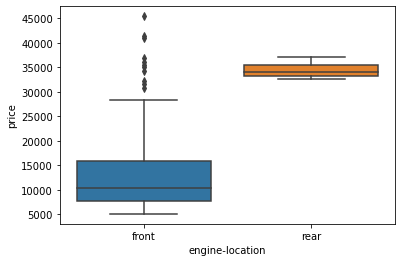

In [43]:
sns.boxplot(x="engine-location",y="price",data=df)

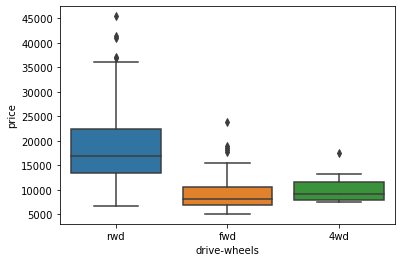

In [44]:
sns.boxplot(x="drive-wheels",y="price",data=df)

<h2 id="discriptive_statistics">3. Descriptive Statistical Analysis</h2>

<p>Let's first take a look at the variables by utilizing a description method.</p>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:
<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>


In [45]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas,aspiration-std,aspiration-turbo
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,0.836373,0.911588,0.898409,2555.565854,126.907317,3.329751,3.255423,...,104.253659,5125.369458,25.219512,8.034347,13207.129353,9.949525,0.097561,0.902439,0.819512,0.180488
std,1.245307,31.681008,6.021776,0.059285,0.029671,0.040862,520.680204,41.642693,0.270844,0.313597,...,39.519219,476.979093,6.542142,1.849782,7868.768212,2.573104,0.297446,0.297446,0.385535,0.385535
min,-2.000000,65.000000,86.600000,0.678039,0.834025,0.799331,1488.000000,61.000000,2.540000,2.070000,...,48.000000,4150.000000,13.000000,4.351852,5118.000000,4.795918,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.000000,94.500000,0.799135,0.886584,0.869565,2145.000000,97.000000,3.150000,3.110000,...,70.000000,4800.000000,19.000000,6.911765,7788.000000,7.833333,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.000000,97.000000,0.832292,0.905947,0.904682,2414.000000,120.000000,3.310000,3.290000,...,95.000000,5200.000000,24.000000,7.833333,10595.000000,9.791667,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.000000,102.400000,0.879865,0.925311,0.928094,2935.000000,141.000000,3.580000,3.410000,...,116.000000,5500.000000,30.000000,9.400000,16500.000000,12.368421,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,288.000000,6600.000000,49.000000,14.687500,45400.000000,18.076923,1.000000,1.000000,1.000000,1.000000


In [46]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,Horsepowerbinned
count,205,205,205,205,205,205,205,205,205
unique,22,2,5,3,2,7,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,116,96,120,202,148,159,94,163


<h3>Value Counts</h3>

<p>Value-counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column 'drive-wheels'. Don’t forget the method "value_counts" only works on Pandas series, not Pandas Dataframes. As a result, we only include one bracket "df['drive-wheels']" not two brackets "df[['drive-wheels']]".</p>

In [63]:
df["value-counts"].value_counts().to_frame()

,value-counts
fwd,120
rwd,76
4wd,9


Let's repeat the above steps but save the results to the dataframe "drive_wheels_counts" and rename the column  'drive-wheels' to 'value_counts'.

In [64]:
drive_wheels_countss = df['value-counts'].value_counts().to_frame()
drive_wheels_countss.rename(columns={'value-counts': 'value_countss'}, inplace=True)
drive_wheels_countss

,value_countss
fwd,120
rwd,76
4wd,9


In [65]:
drive_wheels_countss.index.name = 'drive-wheels'
drive_wheels_countss

,value_countss
drive-wheels,
fwd,120
rwd,76
4wd,9


In [66]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.head(10)

,engine-location
front,202
rear,3


In [67]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,202
rear,3


<h3>Basics of Grouping</h3>

<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.</p>

<p>For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.</p>

In [71]:
df['value-counts'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [72]:
df_group_one = df[['value-counts','body-style','price']]
df_group_one.head()

,value-counts,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0


In [74]:
df_group_one=df_group_one.groupby(["value-counts"],as_index=False).mean()

In [75]:
df_group_one

,value-counts,price
0,4wd,10570.569928
1,fwd,9310.818823
2,rwd,19671.422755


<p>From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.</p>

<p>You can also group with multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combinations 'drive-wheels' and 'body-style'. We can store the results in the variable 'grouped_test1'.</p>

In [84]:
#grouping result
df_gtest=df[['value-counts',"body-style","price"]]
group_test1=df_gtest.groupby(["value-counts","body-style"],as_index=False).mean()
group_test1

,value-counts,body-style,price
0,4wd,hatchback,10405.064677
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9930.934363
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<p>This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot " to create a pivot table from the groups.</p>

<p>In this case, we will leave the drive-wheel variable as the rows of the table, and pivot body-style to become the columns of the table:</p>

In [86]:
group_pivot=group_test1.pivot(index="value-counts",columns="body-style")
group_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
value-counts                                                         
4wd                  NaN           NaN  10405.064677  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9930.934363   
rwd              23949.6  24202.714286  14278.269966  21711.833333   

                            
body-style           wagon  
value-counts                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [88]:
group_pivot = group_pivot.fillna(0) #fill missing values with 0
group_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
value-counts                                                         
4wd                  0.0      0.000000  10405.064677  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9930.934363   
rwd              23949.6  24202.714286  14278.269966  21711.833333   

                            
body-style           wagon  
value-counts                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question 4:</h1>

<p>Use the "groupby" function to find the average "price" of each car based on "body-style" ? </p>
</div>

In [99]:
df_gtest2=df[["body-style","price"]]
df_group_bodystyle=df_gtest2.groupby(["body-style"],as_index=False).mean()
df_group_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,10050.289410
3,sedan,14433.658945
4,wagon,12371.960000


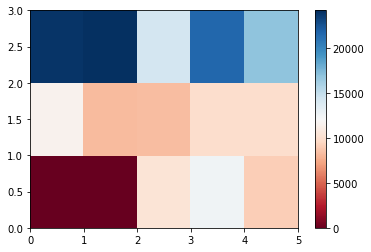

In [102]:
#heat Map
plt.pcolor(group_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

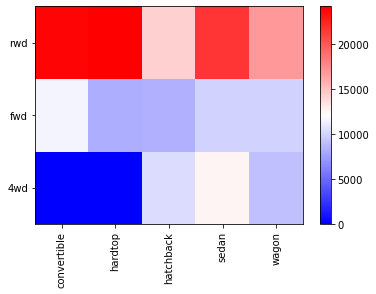

In [110]:
fig, ax = plt.subplots()
im = ax.pcolor(group_pivot, cmap='bwr')

#label names
row_labels = group_pivot.columns.levels[1]
col_labels = group_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(group_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(group_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<p>Visualization is very important in data science, and Python visualization packages provide great freedom. We will go more in-depth in a separate Python Visualizations course.</p>

<p>The main question we want to answer in this module, is "What are the main characteristics which have the most impact on the car price?".</p>

<p>To get a better measure of the important characteristics, we look at the correlation of these variables with the car price, in other words: how is the car price dependent on this variable?</p>

<h2 id="correlation_causation">Correlation and Causation</h2>

<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>

<p3>Pearson Correlation</p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>

In [111]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.465190,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130083,-0.008689,...,0.071380,0.273679,-0.035823,-0.030190,-0.082201,0.063165,-0.194311,0.194311,0.059866,-0.059866
normalized-losses,0.465190,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.029266,0.054929,...,0.203434,0.237748,-0.218749,0.178527,0.133999,0.232682,-0.101437,0.101437,0.006823,-0.006823
wheel-base,-0.531954,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.160944,...,0.351985,-0.360704,-0.470414,0.578128,0.583168,0.474040,0.308346,-0.308346,-0.257611,0.257611
length,-0.357612,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.129522,...,0.554408,-0.287031,-0.670909,0.711597,0.682986,0.659165,0.212679,-0.212679,-0.234539,0.234539
width,-0.232919,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182939,...,0.642176,-0.219859,-0.642704,0.728044,0.728699,0.682850,0.233880,-0.233880,-0.300567,0.300567
height,-0.541038,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.055351,...,-0.110114,-0.320602,-0.048640,0.085892,0.134388,-0.002333,0.284631,-0.284631,-0.087311,0.087311
curb-weight,-0.227691,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168783,...,0.750973,-0.266283,-0.757414,0.836742,0.820825,0.791911,0.217275,-0.217275,-0.324902,0.324902
engine-size,-0.105790,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.203094,...,0.810705,-0.244599,-0.653658,0.777077,0.861752,0.744952,0.069594,-0.069594,-0.108217,0.108217
bore,-0.130083,-0.029266,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.055909,...,0.575707,-0.254761,-0.584508,0.551943,0.532300,0.555960,0.054457,-0.054457,-0.212623,0.212623
stroke,-0.008689,0.054929,0.160944,0.129522,0.182939,-0.055351,0.168783,0.203094,-0.055909,1.000000,...,0.088133,-0.066844,-0.042179,0.055433,0.082095,0.042550,0.241820,-0.241820,-0.222970,0.222970


<b>P-value</b>: 
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [112]:
from scipy import stats

<h3>Wheel-base vs Price</h3>

In [113]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'],df['price'])
print("The Pearson Coeffient is", pearson_coef,"and the p_value is",p_value)

The Pearson Coeffient is 0.5831681499789547 and the p_value is 4.527625545686765e-20


In [114]:
pearson_coef, P_value= stats.pearsonr(df['horsepower'],df['price'])
print("The Pearson Coefficient is",pearson_coef,"and the p_value is",p_value)

The Pearson Coefficient is 0.7579459704465278 and the p_value is 4.527625545686765e-20


In [115]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6829862954386219  with a P-value of P =  1.6498873291218535e-29


In [116]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7286988175931837  with a P-value of P = 3.2145204838049385e-35


In [117]:
pearson_coef , p_value= stats.pearsonr(df['curb-weight'],df['price'],)
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.820824733354729  with a P-value of P =  2.8663321070270534e-51


In [118]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8617522436859721  with a P-value of P = 9.669661923634776e-62


In [119]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5323000195387406  with a P-value of P =   2.1398306512856245e-16


In [120]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6674492651600002  with a P-value of P =  8.463700497727927e-28


In [121]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is 0.7893464215248444  with a P-value of P =  6.915746695419573e-45


<h2 id="anova">6. ANOVA</h2>

<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.</p>

In [127]:
grouped_test2=df_gtest[['value-counts', 'price']].groupby(['value-counts'])
grouped_test2.head(2)

,value-counts,price
0,rwd,13495.000000
1,rwd,16500.000000
3,fwd,13950.000000
4,4wd,17450.000000
5,fwd,15250.000000
9,4wd,13207.129353


In [128]:
df_gtest

,value-counts,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
200,rwd,sedan,16845.0
201,rwd,sedan,19045.0
202,rwd,sedan,21485.0
203,rwd,sedan,22470.0


In [129]:
grouped_test2.get_group('4wd')['price']

4      17450.000000
9      13207.129353
140     7603.000000
144     9233.000000
145    11259.000000
148     8013.000000
149    11694.000000
154     7898.000000
155     8778.000000
Name: price, dtype: float64

<p>Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.</p>

<p>Let's see if different types 'drive-wheels' impact  'price', we group the data.</p>

In [130]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.5036668266912 , P = 3.5392707916047903e-23


In [131]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 129.41115759339715 , P = 2.6524240289951807e-23


In [132]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.879065438652509 , P = 0.00378273257813761


In [133]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 1.1847736755700735 , P = 0.27844756008434524


<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>